🌊 Titanic Survival Prediction — Project Summary
📌 1. Problem Statement

The goal of this project was to predict which passengers were more likely to survive the Titanic disaster using information such as age, gender, and passenger class.

📌 2. About the Dataset
The dataset contains real information of Titanic passengers.

Important columns:

Survived: 1 = survived, 0 = died

Sex: male or female

Pclass: passenger class (1 = highest, 3 = lowest)

Age: age of the passenger

Fare: ticket price

Embarked: port where the passenger boarded the ship

📌 3. Steps I Performed

Loaded the dataset

Checked missing values

Filled missing Age and Embarked

Dropped Cabin (too many missing values)

Did EDA (exploratory data analysis)

Created Age groups

Created Fare groups

Visualized survival patterns

Trained a Logistic Regression model

Checked accuracy and performance

📌 4. Key Findings

Women survived more than men

1st class passengers survived more than 3rd class

Children survived more than adults

Passengers with higher fare had better chances

Male + 3rd class had the lowest survival rate

📌 5. Machine Learning Model

I used Logistic Regression, which is good for binary predictions (0 or 1).

📌 6. Model Performance

Accuracy: ~80%

Good at predicting both survived and not survived

Overall a good basic model

📌 7. Final Conclusion

This project helped me learn how to:

clean data

analyze data

build a basic machine learning model

check model accuracy

The model showed that gender, class, and age had a strong effect on survival.
This completes my first ML project.

Project Completed!

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv(r"c:\Users\kskom\Downloads\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [40]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [41]:
df = df.drop(columns=['Cabin'])

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [43]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [44]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [46]:
df['Survived'].mean() * 100

np.float64(38.38383838383838)

In [47]:
df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [48]:
df.groupby('Pclass')['Survived'].mean() *  100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [49]:
bins = [0, 12, 19, 59, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Teen
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult


In [50]:
df[df['AgeGroup'] == 'Child']['Survived'].value_counts()

Survived
1    40
0    29
Name: count, dtype: int64

In [51]:
df[df['AgeGroup'] == 'Senior']['Survived'].value_counts()

Survived
0    19
1     7
Name: count, dtype: int64

In [52]:
df[df['AgeGroup'] == 'Teen']['Survived'].value_counts()

Survived
0    56
1    39
Name: count, dtype: int64

In [53]:
df[df['AgeGroup'] == 'Adult']['Survived'].value_counts()

Survived
0    445
1    256
Name: count, dtype: int64

In [54]:
df.groupby('AgeGroup')['Survived'].mean() * 100


C:\Users\kskom\AppData\Local\Temp\ipykernel_22060\2256323339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean() * 100


AgeGroup
Child     57.971014
Teen      41.052632
Adult     36.519258
Senior    26.923077
Name: Survived, dtype: float64

In [55]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
df.groupby('FareGroup')['Survived'].mean() * 100

C:\Users\kskom\AppData\Local\Temp\ipykernel_22060\3388016819.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareGroup')['Survived'].mean() * 100


FareGroup
Low          19.730942
Medium       30.357143
High         45.495495
Very High    58.108108
Name: Survived, dtype: float64

In [56]:
df.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [57]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.groupby('FamilySize')['Survived'].mean() * 100


FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [58]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.groupby('IsAlone')['Survived'].mean() * 100


IsAlone
0    50.564972
1    30.353818
Name: Survived, dtype: float64

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

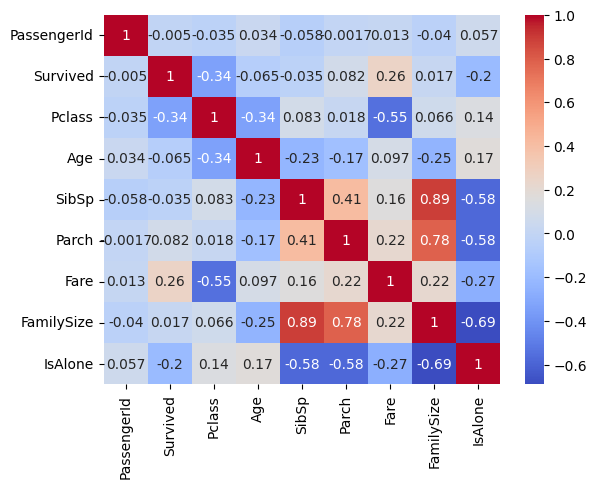

In [61]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [62]:
y = df['Survived']

In [63]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'IsAlone']]

In [64]:
X = pd.get_dummies(X, drop_first=True)

In [65]:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [69]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [70]:
model.predict(X_test[:5])

array([0, 0, 0, 1, 1])

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[90 15]
 [21 53]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

